In [1]:
import json
from core import analysis

In [4]:
db = analysis.access_db()

In [5]:
s = "left: 135px;top: 286px"

In [6]:
trials = analysis.get_trial_data(db)

In [7]:
participants = analysis.get_participant_data(db)

In [8]:
wids = [27046826551,
67313721753,
14715705020,
65643517184,
86979612220,
26312944991]
wids = [str(i) for i in wids]

In [103]:
users = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]['userID']
results = trials[trials['userID'].isin(users)]
results

,trialID,userID,trialIndex,trialType,prevChanged,lemma,sense,x,y
206,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_01,173.0,360.0
207,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_05,614.0,362.0
208,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,depository_financial_institution_n_01,499.0,368.0
209,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_03,241.0,402.0
210,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_04,723.0,324.0
...,...,...,...,...,...,...,...,...,...
583,-M3xeVNWfkT0t_uBUSUG,-M3xbEdg3XIZca4MA7SZ,17,repeat,2,drive_v,force_v_06,-1.0,-1.0
584,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_01,592.0,366.0
585,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_02,403.0,383.0
586,-M3xedDrx2cDlTV-jcAH,-M3xbEdg3XIZca4MA7SZ,18,repeat,1,death_n,death_n_03,345.0,361.0


In [11]:
import numpy as np

In [20]:
def calculate_distance(r1, r2):
    s1 = np.array([r1['x'], r1['y']])
    s2 = np.array([r2['x'], r2['y']])
    return np.linalg.norm(s1 - s2)

1. Get a matrix for each subject/each word
2. Do this for repeat trials, shared trials

In [21]:
calculate_distance(results.iloc[0], results.iloc[1])

441.0045351240733

In [22]:
calculate_distance(results.iloc[0], results.iloc[2])

326.0981447355995

In [23]:
calculate_distance(results.iloc[1], results.iloc[2])

115.15641536623133

In [101]:
def get_subject_mtx(results, userID, word_type, trial_type):
    word_data = results[(results['userID'] == userID) & (results['lemma'] == word_type) & (results['trialType'] == trial_type)]
    result_mtx = []
    senses = word_data['sense']
    for i in range(len(word_data.index)):
        row = []
        for j in range(len(word_data.index)):
            row.append(calculate_distance(word_data.iloc[i], word_data.iloc[j]))
        result_mtx.append(np.asarray(row))
    result_mtx = np.asarray(result_mtx)
    return result_mtx, senses

def plot_mtx(result_mtx, senses):
    fig, ax = plt.subplots()
    im = ax.imshow(result_mtx)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(senses)))
    ax.set_yticks(np.arange(len(senses)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(senses)
    ax.set_yticklabels(senses)
    
    threshold = im.norm(result_mtx.max())/2.
        

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    textcolors = ['black', 'white']
    # Loop over data dimensions and create text annotations.
    for i in range(len(senses)):
        for j in range(len(senses)):
            square_color = textcolors[int(im.norm(result_mtx[i][j]) < threshold)]
            text = ax.text(j, i, np.round(result_mtx[i][j], 3),
                           ha="center", va="center", color=square_color)

    #fig.tight_layout()
    plt.show()


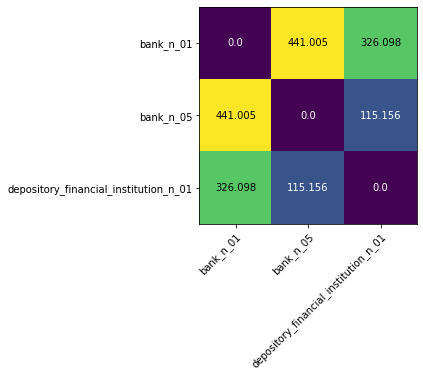

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [104]:
for u in users:
    results, senses = get_subject_mtx(results, u, 'bank_n', 'training')
    plot_mtx(results, senses)